In [1]:
import os
import torch, cv2
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import models, transforms
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [2]:
model = models.detection.fasterrcnn_resnet50_fpn_v2()
device = 'cuda' if torch.cuda.is_available()  else 'cpu'

in_features = model.roi_heads.box_predictor.cls_score.in_features
num_classes = 3

model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)


In [3]:
model.to(device)
saved_path = "fasterrcnn_resnet50_fpn_v2.pth"
state_dict = torch.load(saved_path, weights_only=True) #, map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
model.eval()

folder = 'bus-truck/images'
image = os.path.join(folder, '0b22e954b72ab516.jpg')
img_path = Image.open(image).convert("RGB")

transform = transforms.ToTensor()
img_tensor = transform(img_path)
img_tensor = img_tensor.unsqueeze(0)

img_tensor = img_tensor.to(device)
print(img_tensor.shape)

torch.Size([1, 3, 171, 256])





tensor([[ 13.2077,  53.5767, 198.8567, 141.1042],
        [156.3346,  61.3486, 246.9732, 140.3177]], device='cuda:0')


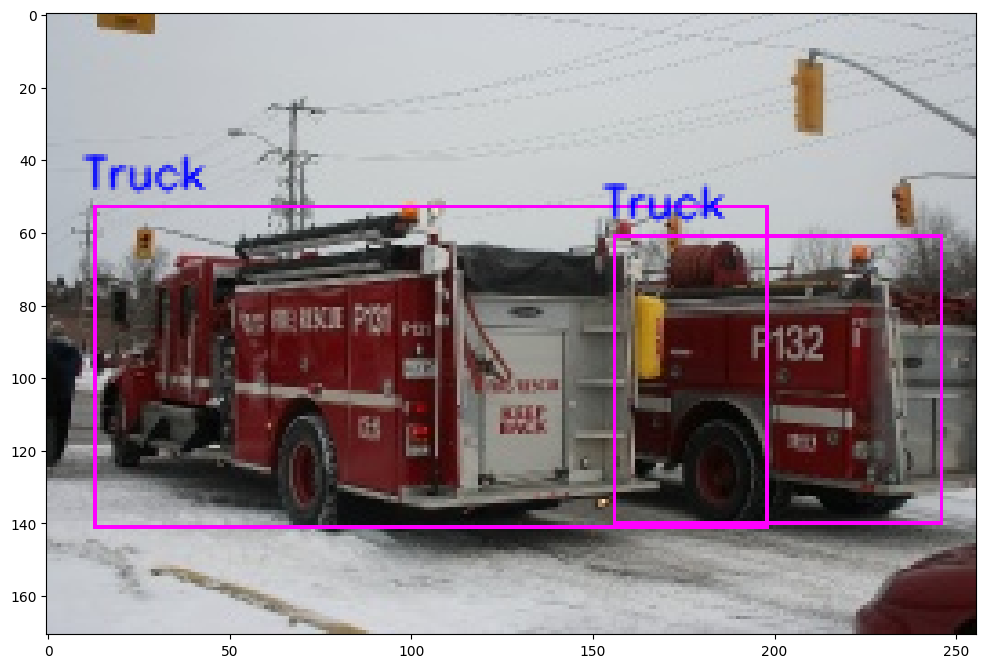

In [20]:
img = cv2.imread(image)
label_map = {1: 'Bus', 2: 'Truck'}

with torch.inference_mode():
    output = model(img_tensor)
    # print(output)
    print("\n\n")
    output = output[0]

    threshold = 0.45
    boxes = output["boxes"]
    labels = output["labels"]
    scores = output["scores"]
    keep = scores > threshold
    
    boxes  = boxes[keep]
    print(boxes)
    labels = labels[keep]
    scores = scores[keep]

    z=len(boxes)
    font = cv2.FONT_HERSHEY_SIMPLEX
    for i in range(z):
        box = boxes[i].to(torch.int)
        box = box.cpu().detach().numpy()
        cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (255, 0, 255), 1)
        cv2.putText(img, label_map[labels[i].item()], (box[0]-3, box[1]-5), font, 
                   0.4, (255, 0, 0), 1, cv2.LINE_AA)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,10))
    plt.imshow(img)
    plt.show()

In [6]:
img_tensor.device

device(type='cuda', index=0)